In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Copy of Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")

In [4]:
data


,Unnamed: 0,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,69,1543,7,118,24,154,0,270,754,4125
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,38,2088,14,112,83,186,0,404,1262,5818
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,23,795,17,126,38,57,0,233,1181,3140
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10673,10673,LAKSHADWEEP,LAKSHADWEEP,2014,0,0,0,1,0,1,...,5,1,0,1,2,0,0,0,30,81
10674,10674,LAKSHADWEEP,TOTAL,2014,0,0,0,1,0,1,...,5,1,0,1,2,0,0,0,30,81
10675,10675,PUDUCHERRY,KARAIKAL,2014,6,1,0,3,0,3,...,0,8,0,12,1,1,0,44,322,671
10676,10676,PUDUCHERRY,PUDUCHERRY,2014,19,14,3,7,1,5,...,1,97,1,20,7,3,0,165,1014,2913


In [7]:
#Remove "Total" rows per state
no_total_rows = data[data['DISTRICT'].str.strip().str.upper() != 'TOTAL'].copy()


In [8]:
no_total_rows

,Unnamed: 0,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,69,1543,7,118,24,154,0,270,754,4125
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,38,2088,14,112,83,186,0,404,1262,5818
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,23,795,17,126,38,57,0,233,1181,3140
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,10670,DELHI UT,VIGILANCE,2014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10671,10671,DELHI UT,WEST,2014,55,77,6,251,0,224,...,18,76,13,484,63,416,0,246,3206,18488
10673,10673,LAKSHADWEEP,LAKSHADWEEP,2014,0,0,0,1,0,1,...,5,1,0,1,2,0,0,0,30,81
10675,10675,PUDUCHERRY,KARAIKAL,2014,6,1,0,3,0,3,...,0,8,0,12,1,1,0,44,322,671


In [9]:
d = no_total_rows.groupby(["DISTRICT"])["TOTAL IPC CRIMES"].sum().reset_index()

In [11]:
#District wise total IPC crimes
d

,DISTRICT,TOTAL IPC CRIMES
0,24 PARGANAS NORTH,136204
1,24 PARGANAS SOUTH,136479
2,A and N ISLANDS,807
3,ADILABAD,74376
4,AGAR,2861
...,...,...
946,WOKHA,1079
947,YADGIRI,7605
948,YAMUNANAGAR,27209
949,YAVATMAL,81439


In [12]:
a = d.sort_values(by="DISTRICT")

In [13]:
a

,DISTRICT,TOTAL IPC CRIMES
0,24 PARGANAS NORTH,136204
1,24 PARGANAS SOUTH,136479
2,A and N ISLANDS,807
3,ADILABAD,74376
4,AGAR,2861
...,...,...
946,WOKHA,1079
947,YADGIRI,7605
948,YAMUNANAGAR,27209
949,YAVATMAL,81439


In [17]:
#Average murders per district
no_total_rows.groupby('DISTRICT')['MURDER'].mean()


DISTRICT
24 PARGANAS NORTH    189.615385
24 PARGANAS SOUTH    180.000000
A and N ISLANDS       15.000000
ADILABAD              98.785714
AGAR                  12.000000
                        ...    
WOKHA                  5.642857
YADGIRI               27.600000
YAMUNANAGAR           32.785714
YAVATMAL              73.642857
ZUNHEBOTO              4.571429
Name: MURDER, Length: 951, dtype: float64

In [18]:
#Use only 'Total' rows for each state (aggregated totals)
total_crime = data[data['DISTRICT'].str.strip().str.upper() == 'TOTAL']

In [19]:
# Step 2: Select and sort total IPC crimes by state
state_crime_distribution = total_crime[['STATE/UT', 'TOTAL IPC CRIMES']].sort_values(by='TOTAL IPC CRIMES', ascending=False)

In [20]:

# View top states with highest crimes
print(state_crime_distribution.head(10))

             STATE/UT  TOTAL IPC CRIMES
10245  MADHYA PRADESH            272423
10292     MAHARASHTRA            249834
10596   UTTAR PRADESH            240475
9472      MAHARASHTRA            234385
9426   MADHYA PRADESH            227453
9760    UTTAR PRADESH            226445
8611   MADHYA PRADESH            220335
9050   ANDHRA PRADESH            218015
7810   MADHYA PRADESH            217094
7025   MADHYA PRADESH            214269


In [21]:
top_5_districts = no_total_rows.groupby(["DISTRICT"])["TOTAL IPC CRIMES"].sum().reset_index().sort_values(by="TOTAL IPC CRIMES", ascending=False).head(5)

In [22]:
top_5_districts

,DISTRICT,TOTAL IPC CRIMES
227,DELHI UT TOTAL,633174
75,BANGALORE COMMR.,380665
593,MUMBAI COMMR.,297871
367,INDORE,250639
7,AHMEDABAD COMMR.,239263


In [28]:
#Generate a new column, Population - We have assumed that it follows an uniform distribution.

# Set random seed
np.random.seed(42)

# Get unique districts
unique_districts = no_total_rows['DISTRICT'].unique()

# Generate random population per district
pop_dict = {
    district: int(np.random.uniform(100000, 5000000))
    for district in unique_districts
}

# Map population back to original DataFrame
no_total_rows['population'] = no_total_rows['DISTRICT'].map(pop_dict)

In [29]:
no_total_rows

,Unnamed: 0,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,population,area_type
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,16,149,34,175,0,181,1518,4154,1935246,Rural
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,7,118,24,154,0,270,754,4125,4758500,Urban
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,14,112,83,186,0,404,1262,5818,3686770,Urban
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,17,126,38,57,0,233,1181,3140,3033426,Urban
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,12,109,58,247,0,431,2313,6507,864491,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,10670,DELHI UT,VIGILANCE,2014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3042532,Urban
10671,10671,DELHI UT,WEST,2014,55,77,6,251,0,224,...,13,484,63,416,0,246,3206,18488,4563543,Urban
10673,10673,LAKSHADWEEP,LAKSHADWEEP,2014,0,0,0,1,0,1,...,0,1,2,0,0,0,30,81,849009,Rural
10675,10675,PUDUCHERRY,KARAIKAL,2014,6,1,0,3,0,3,...,0,12,1,1,0,44,322,671,4654692,Urban


In [30]:
#Generating another column based on the population. If the population > 2500000, itis marked as urban.
no_total_rows['area_type'] = no_total_rows['population'].apply(lambda x: 'Urban' if x > 2500000 else   'Rural')


In [26]:
no_total_rows

,Unnamed: 0,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,population,area_type
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,16,149,34,175,0,181,1518,4154,1935246,Rural
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,7,118,24,154,0,270,754,4125,4758500,Urban
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,14,112,83,186,0,404,1262,5818,3686770,Urban
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,17,126,38,57,0,233,1181,3140,3033426,Urban
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,12,109,58,247,0,431,2313,6507,864491,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,10670,DELHI UT,VIGILANCE,2014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3042532,Urban
10671,10671,DELHI UT,WEST,2014,55,77,6,251,0,224,...,13,484,63,416,0,246,3206,18488,4563543,Urban
10673,10673,LAKSHADWEEP,LAKSHADWEEP,2014,0,0,0,1,0,1,...,0,1,2,0,0,0,30,81,849009,Rural
10675,10675,PUDUCHERRY,KARAIKAL,2014,6,1,0,3,0,3,...,0,12,1,1,0,44,322,671,4654692,Urban


In [31]:
#Checking the counts of rural and urban
print(no_total_rows['area_type'].value_counts())


area_type
Urban    5283
Rural    4916
Name: count, dtype: int64


In [32]:
non_crime_cols = ['STATE/UT', 'DISTRICT', 'YEAR', 'population', 'area_type','CUSTODIAL RAPE','OTHER RAPE','AUTO THEFT','OTHER THEFT','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','OTHER IPC CRIMES','TOTAL IPC CRIMES']
crime_cols = [col for col in no_total_rows.columns if col not in non_crime_cols]


In [33]:
crime_cols

['Unnamed: 0',
 'MURDER',
 'ATTEMPT TO MURDER',
 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
 'RAPE',
 'KIDNAPPING & ABDUCTION',
 'DACOITY',
 'PREPARATION AND ASSEMBLY FOR DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'RIOTS',
 'CRIMINAL BREACH OF TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT',
 'DOWRY DEATHS',
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
 'INSULT TO MODESTY OF WOMEN',
 'CRUELTY BY HUSBAND OR HIS RELATIVES',
 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
 'CAUSING DEATH BY NEGLIGENCE']

In [34]:
all_crime_types = no_total_rows[crime_cols].drop("Unnamed: 0", axis=1)

In [35]:
urban_rural_crime_all = no_total_rows.groupby('area_type')[crime_cols].sum().drop("Unnamed: 0", axis=1)
urban_rural_crime_all.columns.name = None  # remove axis label


In [36]:
urban_rural_crime_all  # view top 10 crime categorie

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE
area_type,,,,,,,,,,,,,,,,,,,,,
Rural,233265,207642,26027,158569,238180,33451,19574,163789,646429,2319997,...,477288,15346,64452,1736474,53823,302191,73277,542932,427,606515
Urban,242818,226927,26199,159377,234637,35277,19602,160956,713533,2227165,...,533504,16220,68472,2097841,55502,311648,74791,589509,511,643206


In [37]:
urban_rural_crime_all.T  # view top 10 crime categorie

area_type,Rural,Urban
MURDER,233265,242818
ATTEMPT TO MURDER,207642,226927
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,26027,26199
RAPE,158569,159377
KIDNAPPING & ABDUCTION,238180,234637
DACOITY,33451,35277
PREPARATION AND ASSEMBLY FOR DACOITY,19574,19602
ROBBERY,163789,160956
BURGLARY,646429,713533
THEFT,2319997,2227165


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = all_crime_types.corr()

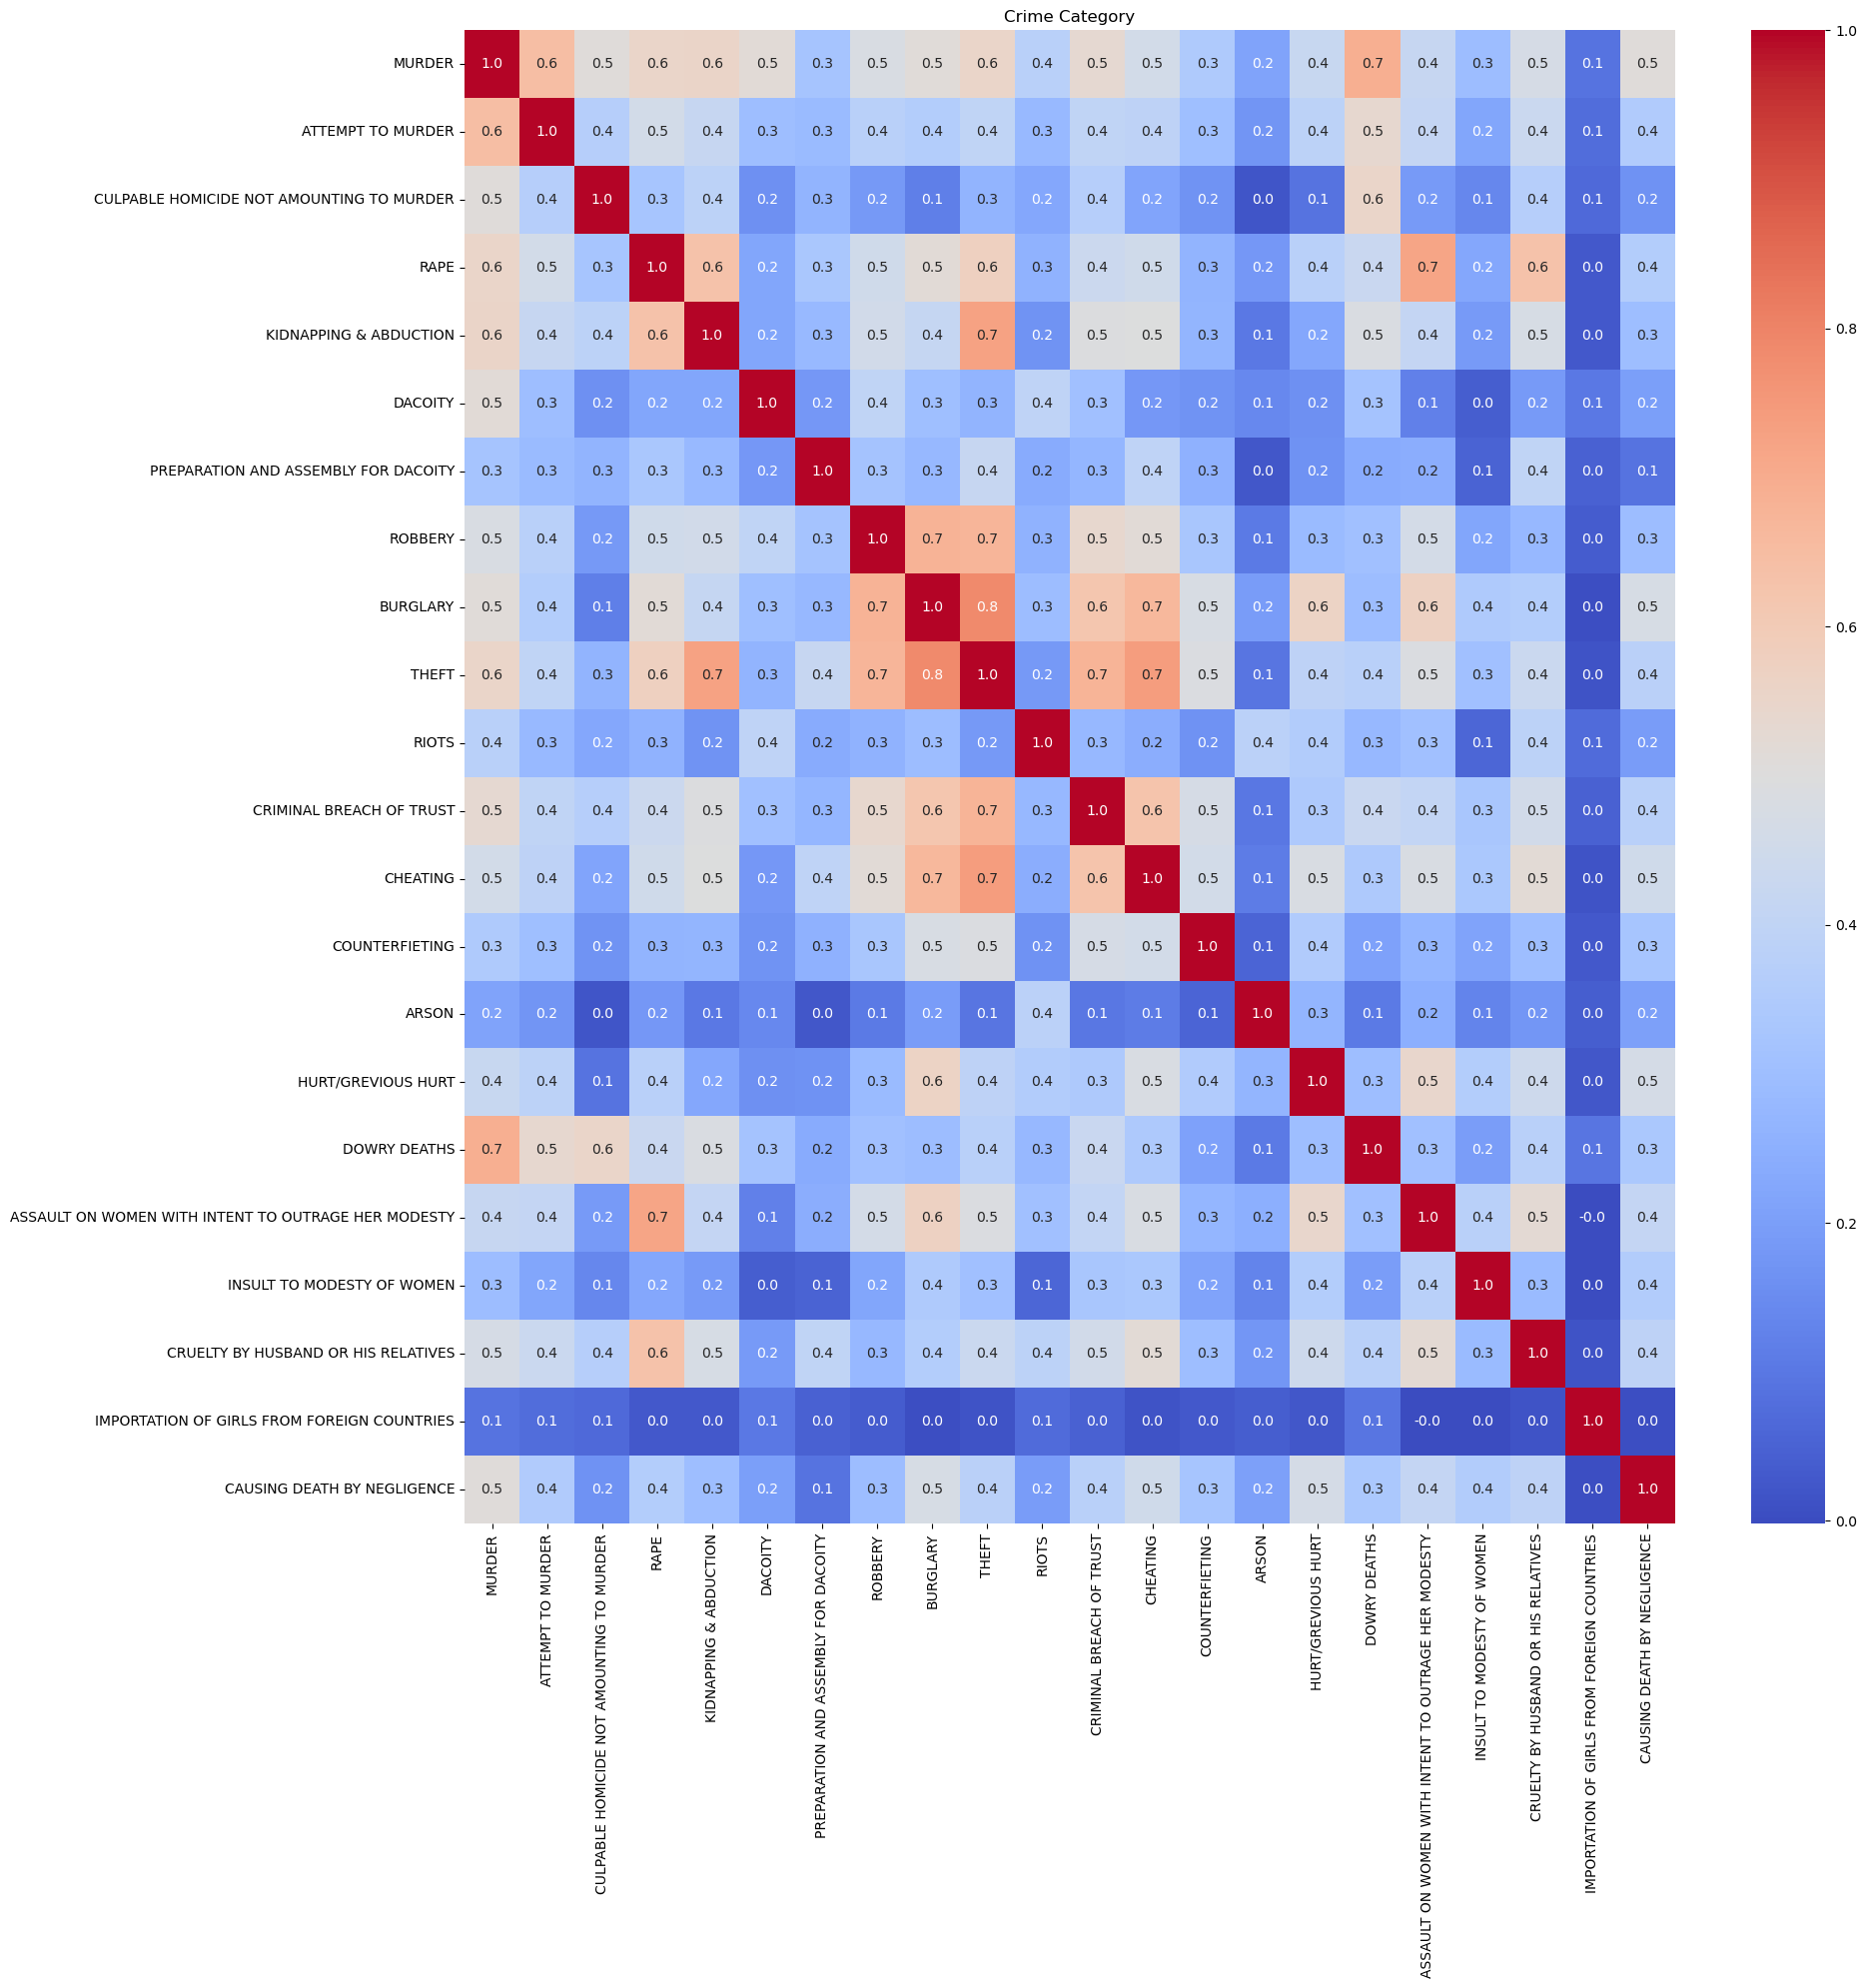

In [39]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Crime Category")
plt.tight_layout()
plt.show()

**To calculate a crime rate, you divide the number of reported crimes by the total population of a given area. The result is then typically multiplied by a standard base, such as 100,000, to express the rate as the number of crimes per 100,000 people.**

In [40]:
# Make a copy to avoid altering the original data
normalized_df = no_total_rows.copy()

# Columns to normalize (add more if needed)
crime_cols_to_normalize = [
    'TOTAL IPC CRIMES',
    'MURDER',
    'RAPE',
    'KIDNAPPING & ABDUCTION',
    'ROBBERY',
    'BURGLARY',
    'THEFT',

    'ATTEMPT TO MURDER',
    'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',


    'DACOITY',
    'PREPARATION AND ASSEMBLY FOR DACOITY',

    'RIOTS',
    'CRIMINAL BREACH OF TRUST',
    'CHEATING',
    'COUNTERFIETING',
    'ARSON',
    'HURT/GREVIOUS HURT',
    'DOWRY DEATHS',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
    'INSULT TO MODESTY OF WOMEN',
    'CRUELTY BY HUSBAND OR HIS RELATIVES',
    'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'CAUSING DEATH BY NEGLIGENCE'
]

# Normalize per 100,000 people
for col in crime_cols_to_normalize:
    normalized_df[f'{col}_per_100k'] = (normalized_df[col] / normalized_df['population']) * 100000


In [41]:
normalized_df['TOTAL IPC CRIMES_per_100k']

0        214.649714
1         86.686981
2        157.807512
3        103.513321
4        752.697252
            ...    
10670      0.000000
10671    405.123826
10673      9.540535
10675     14.415562
10676     77.405777
Name: TOTAL IPC CRIMES_per_100k, Length: 10199, dtype: float64

In [42]:
normalized_df.columns

Index(['Unnamed: 0', 'STATE/UT', 'DISTRICT', 'YEAR', 'MURDER',
       'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
       'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'population', 'area_type', 'TOTAL IPC CRIMES_per_100k',
       'MURDER_per_100k', 'RAPE_per_100k', 'KIDNAPPING & ABDUCTION_per_100k',
       'ROBBERY_per_100k', 'BURGLA

In [44]:
#Top 10 Districts with Highest Crime Rates (per 100,000 people)

import matplotlib.pyplot as plt
top_10 = normalized_df.groupby('DISTRICT')['TOTAL IPC CRIMES_per_100k'].sum().sort_values(ascending=False).head(10)


In [45]:
top_10

DISTRICT
RAIPUR               86318.576810
MUMBAI COMMR.        84159.803354
BHOPAL               80014.110988
24 PARGANAS SOUTH    48786.582162
BELGAUM              45688.159010
ALWAR                41349.608165
KRISHNA              40723.574160
GWALIOR              38177.160005
JALPAIGURI           37899.046121
DELHI UT TOTAL       33695.545162
Name: TOTAL IPC CRIMES_per_100k, dtype: float64

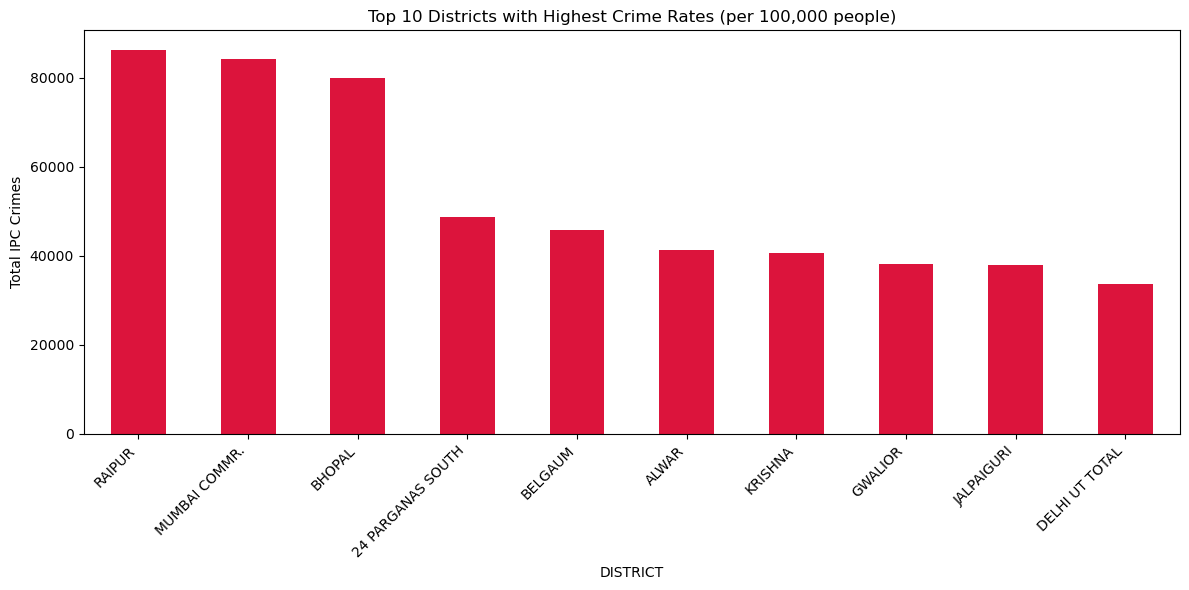

In [46]:
plt.figure(figsize=(12, 6))
top_10.plot(kind='bar', color='crimson')
plt.title("Top 10 Districts with Highest Crime Rates (per 100,000 people)")
plt.ylabel("Total IPC Crimes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [47]:
no_total_rows

,Unnamed: 0,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,population,area_type
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,16,149,34,175,0,181,1518,4154,1935246,Rural
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,7,118,24,154,0,270,754,4125,4758500,Urban
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,14,112,83,186,0,404,1262,5818,3686770,Urban
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,17,126,38,57,0,233,1181,3140,3033426,Urban
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,12,109,58,247,0,431,2313,6507,864491,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,10670,DELHI UT,VIGILANCE,2014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3042532,Urban
10671,10671,DELHI UT,WEST,2014,55,77,6,251,0,224,...,13,484,63,416,0,246,3206,18488,4563543,Urban
10673,10673,LAKSHADWEEP,LAKSHADWEEP,2014,0,0,0,1,0,1,...,0,1,2,0,0,0,30,81,849009,Rural
10675,10675,PUDUCHERRY,KARAIKAL,2014,6,1,0,3,0,3,...,0,12,1,1,0,44,322,671,4654692,Urban


In [48]:
v3 = no_total_rows.groupby("DISTRICT")['TOTAL IPC CRIMES'].sum().sort_values(ascending=False).reset_index()

In [49]:
v3

,DISTRICT,TOTAL IPC CRIMES
0,DELHI UT TOTAL,633174
1,BANGALORE COMMR.,380665
2,MUMBAI COMMR.,297871
3,INDORE,250639
4,AHMEDABAD COMMR.,239263
...,...,...
946,SPL NARCOTIC,1
947,ANTI TERRORIST SQUAD,0
948,DISCOM,0
949,VIGILANCE,0


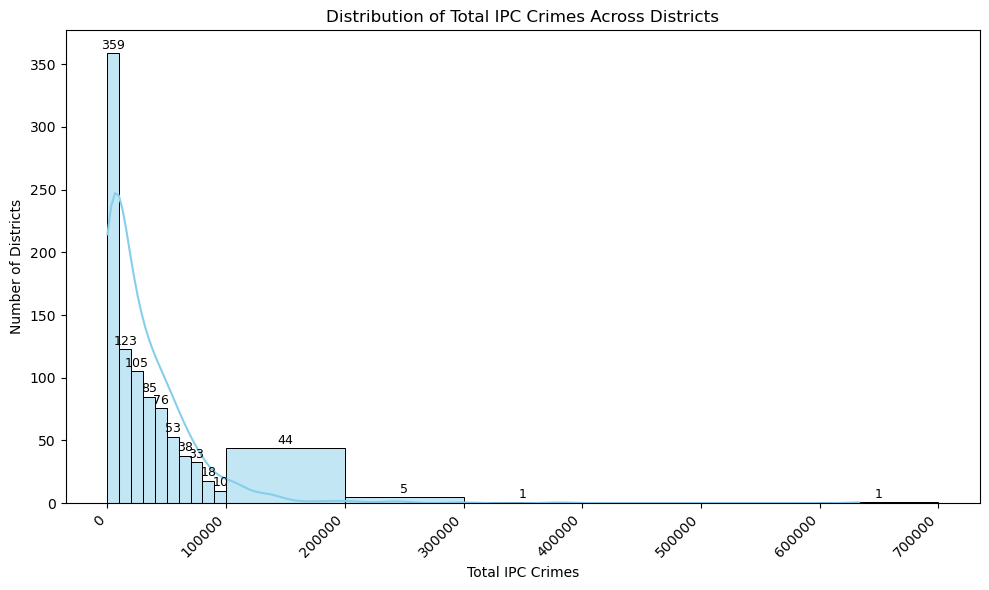

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0, 10000, 20000, 30000, 40000, 50000, 60000,70000, 80000, 90000,100000, 200000, 300000, 400000, 500000, 600000, 700000]

plt.figure(figsize=(10, 6))
ax = sns.histplot(v3['TOTAL IPC CRIMES'], bins=bins, kde=True, color='skyblue')

# Annotate bars with count labels
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height + 1,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title('Distribution of Total IPC Crimes Across Districts')
plt.xlabel('Total IPC Crimes')
plt.ylabel('Number of Districts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [50]:
v2 = no_total_rows.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index().sort_values(by='TOTAL IPC CRIMES',ascending=False)



In [51]:
v2

,STATE/UT,TOTAL IPC CRIMES
19,MADHYA PRADESH,2913646
20,MAHARASHTRA,2757655
30,TAMIL NADU,2456955
1,ANDHRA PRADESH,2351600
33,UTTAR PRADESH,2324994
28,RAJASTHAN,2262558
17,KERALA,1820582
16,KARNATAKA,1755090
4,BIHAR,1691343
11,GUJARAT,1674595


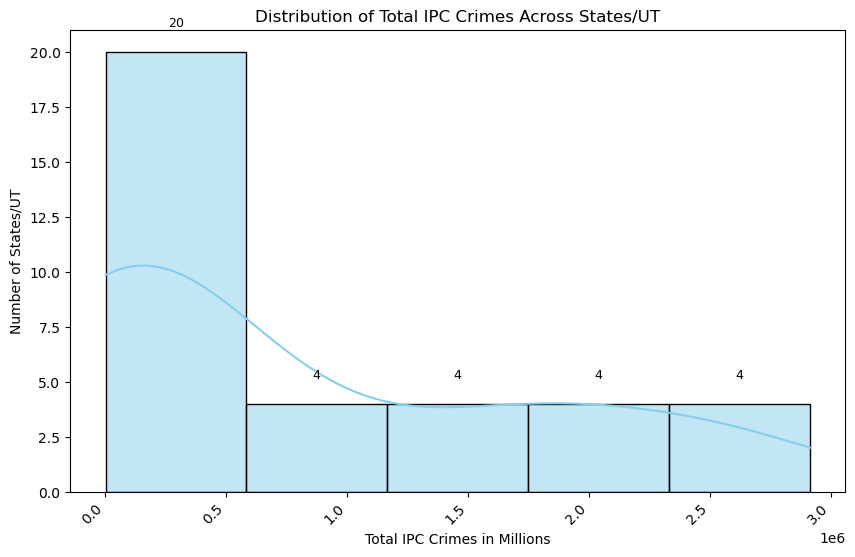

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

#bins = [0, 10000, 20000, 30000, 40000, 50000, 60000,70000, 80000, 90000,100000, 200000, 300000, 400000, 500000, 600000, 700000]

plt.figure(figsize=(10, 6))
ax = sns.histplot(v2['TOTAL IPC CRIMES'], bins=5, kde=True, color='skyblue')

# Annotate bars with count labels
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height + 1,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title('Distribution of Total IPC Crimes Across States/UT')
plt.xlabel('Total IPC Crimes in Millions')
plt.ylabel('Number of States/UT')
plt.xticks(rotation=45, ha='right')
plt.show()

In [53]:
v3

,DISTRICT,TOTAL IPC CRIMES
0,DELHI UT TOTAL,633174
1,BANGALORE COMMR.,380665
2,MUMBAI COMMR.,297871
3,INDORE,250639
4,AHMEDABAD COMMR.,239263
...,...,...
946,SPL NARCOTIC,1
947,ANTI TERRORIST SQUAD,0
948,DISCOM,0
949,VIGILANCE,0


In [54]:
v4 = no_total_rows.groupby(['YEAR',"DISTRICT"])[['MURDER','RAPE']].sum().reset_index()

In [55]:
v4

,YEAR,DISTRICT,MURDER,RAPE
0,2001,24 PARGANAS NORTH,202,53
1,2001,24 PARGANAS SOUTH,107,47
2,2001,ADILABAD,101,50
3,2001,AGRA,153,66
4,2001,AHMEDABAD COMMR.,90,39
...,...,...,...,...
9965,2014,WOKHA,10,0
9966,2014,YADGIRI,31,41
9967,2014,YAMUNANAGAR,45,50
9968,2014,YAVATMAL,75,108


In [56]:
!pip install dash

Defaulting to user installation because normal site-packages is not writeable


In [70]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Crime Cases in Indian Districts", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select District:"),
        dcc.Dropdown(
            id='district-dropdown',
            options=[{'label': d, 'value': d} for d in sorted(v4['DISTRICT'].unique())],
            value='AGRA'  # default
        )
    ], style={'width': '32%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Select Crime Type:"),
        dcc.Dropdown(
            id='crime-dropdown',
            options=[
                {'label': 'Murder', 'value': 'MURDER'},
                {'label': 'Rape', 'value': 'RAPE'}
            ],
            value='MURDER'  # default
        )
    ], style={'width': '32%', 'display': 'inline-block', 'marginLeft': '2%'}),

    html.Div([
        html.Label("Select Year Range:"),
        dcc.RangeSlider(
            id='year-slider',
            min=v4['YEAR'].min(),
            max=v4['YEAR'].max(),
            step=1,
            marks={str(year): str(year) for year in sorted(v4['YEAR'].unique())},
            value=[2001, 2014]
        )
    ], style={'width': '100%', 'padding': '20px 0'}),

    dcc.Graph(id='crime-line-chart')
])

# Callback
@app.callback(
    Output('crime-line-chart', 'figure'),
    Input('district-dropdown', 'value'),
    Input('year-slider', 'value'),
    Input('crime-dropdown', 'value')
)
def update_chart(selected_district, selected_years, selected_crime):
    filtered_df = v4[
        (v4['DISTRICT'] == selected_district) &
        (v4['YEAR'] >= selected_years[0]) &
        (v4['YEAR'] <= selected_years[1])
    ]
    fig = px.line(filtered_df, x='YEAR', y=selected_crime, title=f"{selected_crime} Cases in {selected_district}")
    fig.update_traces(mode='lines+markers')
    return fig

# Run server
if __name__ == '__main__':
    app.run(debug=True,port = 8181)


In [64]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html, Input, Output, dash_table
import plotly.express as px


In [65]:
no_total_rows

,Unnamed: 0,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,population,area_type
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,16,149,34,175,0,181,1518,4154,1935246,Rural
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,7,118,24,154,0,270,754,4125,4758500,Urban
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,14,112,83,186,0,404,1262,5818,3686770,Urban
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,17,126,38,57,0,233,1181,3140,3033426,Urban
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,12,109,58,247,0,431,2313,6507,864491,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,10670,DELHI UT,VIGILANCE,2014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3042532,Urban
10671,10671,DELHI UT,WEST,2014,55,77,6,251,0,224,...,13,484,63,416,0,246,3206,18488,4563543,Urban
10673,10673,LAKSHADWEEP,LAKSHADWEEP,2014,0,0,0,1,0,1,...,0,1,2,0,0,0,30,81,849009,Rural
10675,10675,PUDUCHERRY,KARAIKAL,2014,6,1,0,3,0,3,...,0,12,1,1,0,44,322,671,4654692,Urban


In [71]:
#INDIAN CRIME DASHBOARD

import dash
from dash import dcc, html, dash_table, Input, Output
import pandas as pd
import plotly.express as px

# Load your data
df = no_total_rows.copy()
crime_cols = df.columns[4:-2]  # Adjust as per your dataset

# Dash app
app = dash.Dash(__name__)
app.title = "India Crime Dashboard"

# Layout
app.layout = html.Div([
    html.H1("Crime Dashboard of Indian Districts", style={
        'textAlign': 'center',
        'color': '#2E4053',
        'fontFamily': 'Arial Black',
        'marginTop': '20px'
    }),

    html.Div([
        html.Div([
            html.Label("Select State(s):"),
            dcc.Dropdown(id='state-dropdown',
                         options=[{'label': s, 'value': s} for s in sorted(df['STATE/UT'].unique())],
                         multi=True, value=[],
                         style={'backgroundColor': '#F0F8FF'})
        ], className='filter-item'),

        html.Div([
            html.Label("Select Area Type:"),
            dcc.Dropdown(id='areatype-dropdown',
                         options=[{'label': i, 'value': i} for i in df['area_type'].unique()],
                         multi=True, value=[],
                         style={'backgroundColor': '#F0F8FF'})
        ], className='filter-item'),

        html.Div([
            html.Label("Select District(s):"),
            dcc.Dropdown(id='district-dropdown',
                         multi=True, value=[],
                         style={'backgroundColor': '#F0F8FF'})
        ], className='filter-item'),

        html.Div([
            html.Label("Select Crime Type(s):"),
            dcc.Dropdown(id='crime-dropdown',
                         options=[{'label': c, 'value': c} for c in crime_cols],
                         multi=True, value=['MURDER'],
                         style={'backgroundColor': '#F0F8FF'})
        ], className='filter-item')
    ], style={
        'display': 'grid',
        'gridTemplateColumns': 'repeat(auto-fit, minmax(300px, 1fr))',
        'gap': '20px',
        'padding': '30px',
        'fontFamily': 'Verdana'
    }),

     html.Div([
            html.Label("Select Year:"),
            dcc.RangeSlider(id='year-slider',
                            min=df['YEAR'].min(),
                            max=df['YEAR'].max(),
                            step=1,
                            marks={str(y): str(y) for y in sorted(df['YEAR'].unique())},
                            value=[df['YEAR'].min(), df['YEAR'].max()],
                            tooltip={"placement": "bottom", "always_visible": True})
        ], className='filter-item'),

    html.Div([
        html.Div([
            html.H2("Total IPC Crimes", style={'textAlign': 'center', 'color': '#1C2833'}),
            html.Div(id='ipc-total', style={
                'fontSize': 36,
                'textAlign': 'center',
                'color': '#34495E',
                'backgroundColor': '#FFE5B4',
                'padding': '20px',
                'borderRadius': '12px',
                'boxShadow': '0 2px 10px rgba(0,0,0,0.1)'
            })
        ], style={'width': '48%', 'marginRight': '2%'}),

        html.Div([
            html.H2("Selected Crime Count", style={'textAlign': 'center', 'color': '#1C2833'}),
            html.Div(id='selected-crime-total', style={
                'fontSize': 36,
                'textAlign': 'center',
                'color': '#34495E',
                'backgroundColor': '#C1F0F6',
                'padding': '20px',
                'borderRadius': '12px',
                'boxShadow': '0 2px 10px rgba(0,0,0,0.1)'
            })
        ], style={'width': '48%'})
    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '0 30px 30px 30px'}),

    dcc.Graph(id='ipc-line', style={'padding': '0px 30px'}),

    html.H3("Crime Summary Table", style={ 'fontFamily': 'Verdana'}),
    dash_table.DataTable(id='crime-table',
                         columns=[
                             {'name': 'YEAR', 'id': 'YEAR'},
                             {'name': 'STATE/UT', 'id': 'STATE/UT'},
                             {'name': 'DISTRICT', 'id': 'DISTRICT'},
                             {'name': 'TOTAL IPC CRIMES', 'id': 'TOTAL IPC CRIMES'},
                             {'name': 'CRIME TYPE', 'id': 'CRIME TYPE'}
                         ],
                         style_table={'overflowX': 'auto'},
                         style_cell={
                             'fontFamily': 'Arial',
                             'textAlign': 'center',
                             'padding': '5px',
                             'backgroundColor': '#FAFAFA',
                             'color': '#2C3E50'
                         },
                         style_header={
                             'backgroundColor': '#B5EAD7',
                             'fontWeight': 'bold'
                         },
                         page_size=10)
],
style={'backgroundColor': '#FEF9E7', 'paddingBottom': '50px'}
)

# Callback to update district dropdown
@app.callback(
    Output('district-dropdown', 'options'),
    Input('state-dropdown', 'value'),
    Input('areatype-dropdown', 'value')
)
def update_district_options(states, areatypes):
    dff = df.copy()
    if states:
        dff = dff[dff['STATE/UT'].isin(states)]
    if areatypes:
        dff = dff[dff['area_type'].isin(areatypes)]
    districts = sorted(dff['DISTRICT'].unique())
    return [{'label': d, 'value': d} for d in districts]

# Main callback
@app.callback(
    Output('ipc-total', 'children'),
    Output('selected-crime-total', 'children'),
    Output('ipc-line', 'figure'),
    Output('crime-table', 'data'),
    Input('state-dropdown', 'value'),
    Input('district-dropdown', 'value'),
    Input('areatype-dropdown', 'value'),
    Input('year-slider', 'value'),
    Input('crime-dropdown', 'value')
)
def update_dashboard(states, districts, areatypes, years, crimes):
    dff = df.copy()

    if states:
        dff = dff[dff['STATE/UT'].isin(states)]
    if districts:
        dff = dff[dff['DISTRICT'].isin(districts)]
    if areatypes:
        dff = dff[dff['area_type'].isin(areatypes)]
    dff = dff[(dff['YEAR'] >= years[0]) & (dff['YEAR'] <= years[1])]

    total_ipc = dff['TOTAL IPC CRIMES'].sum()
    selected_crime_total = dff[crimes].sum().sum() if crimes else 0

    if crimes:
        crime_trend = dff.groupby('YEAR')[crimes].sum().sum(axis=1).reset_index(name='CRIME COUNT')
        ipc_fig = px.line(crime_trend, x='YEAR', y='CRIME COUNT', title='Year-wise Selected Crime Trend',
                          color_discrete_sequence=['#5D3FD3'])
        ipc_fig.update_layout(
            title_font_size=20,
            plot_bgcolor="#FFFFFF",
            paper_bgcolor="#FFFFFF",
            font=dict(color="#2C3E50"),
            xaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.4)', gridwidth=1),
            yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.4)', gridwidth=1),
        )
        ipc_fig.update_traces(mode='lines+markers')
    else:
        ipc_fig = px.line(title='No Crime Type Selected')

    table_data = []
    for crime in crimes:
        grouped = dff.groupby(['YEAR', 'STATE/UT', 'DISTRICT'])[[crime, 'TOTAL IPC CRIMES']].sum().reset_index()
        for _, row in grouped.iterrows():
            table_data.append({
                'YEAR': row['YEAR'],
                'STATE/UT': row['STATE/UT'],
                'DISTRICT': row['DISTRICT'],
                'TOTAL IPC CRIMES': row['TOTAL IPC CRIMES'],
                'CRIME TYPE': f"{crime}: {int(row[crime])}"
            })

    return f"{total_ipc:,}", f"{int(selected_crime_total):,}", ipc_fig, table_data


# Run app
if __name__ == '__main__':
    app.run(debug=True, port=8080)


In [72]:
# Calculate crime rate per 100,000 population
no_total_rows["Crime Rate"] = (no_total_rows["TOTAL IPC CRIMES"] / no_total_rows["population"]) * 100000

In [73]:
# Group by state and get mean crime rate
state_crime_rate = no_total_rows.groupby("STATE/UT")["Crime Rate"].mean().reset_index()

In [74]:
# Identify the state with the lowest crime rate
lowest_crime_state = state_crime_rate.sort_values("Crime Rate").iloc[0]
print(f"State with lowest crime rate: {lowest_crime_state['STATE/UT']} ({lowest_crime_state['Crime Rate']:.2f} per 100,000 people)")

State with lowest crime rate: LAKSHADWEEP (7.27 per 100,000 people)


Then, here are some general factors that could explain lower crime rates:

🧘‍♀️ 1. Demographics & Lifestyle
Smaller population sizes, especially tribal or rural communities, often show lower crime rates due to close-knit societies.

Lower urbanization reduces the type of crimes more prevalent in cities (e.g., theft, assaults).

👮 2. Policing and Governance
Some states may have more efficient law enforcement or community policing systems that deter crime.

Better law and order infrastructure or local governance can play a major role.

🕊️ 3. Cultural and Social Cohesion
Strong community values and local conflict resolution mechanisms reduce the need for formal policing.

Lower instances of domestic violence, drug abuse, or organized crime contribute to fewer IPC (Indian Penal Code) violations.

🧾 4. Underreporting
Some states may report fewer crimes not because they don't happen, but because of:

Social stigma

Lack of access to police

Poor reporting infrastructure

So a low crime rate ≠ always safer — it might reflect underreporting too.

In [75]:
no_total_rows

,Unnamed: 0,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,population,area_type,Crime Rate
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,149,34,175,0,181,1518,4154,1935246,Rural,214.649714
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,118,24,154,0,270,754,4125,4758500,Urban,86.686981
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,112,83,186,0,404,1262,5818,3686770,Urban,157.807512
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,126,38,57,0,233,1181,3140,3033426,Urban,103.513321
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,109,58,247,0,431,2313,6507,864491,Rural,752.697252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,10670,DELHI UT,VIGILANCE,2014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3042532,Urban,0.000000
10671,10671,DELHI UT,WEST,2014,55,77,6,251,0,224,...,484,63,416,0,246,3206,18488,4563543,Urban,405.123826
10673,10673,LAKSHADWEEP,LAKSHADWEEP,2014,0,0,0,1,0,1,...,1,2,0,0,0,30,81,849009,Rural,9.540535
10675,10675,PUDUCHERRY,KARAIKAL,2014,6,1,0,3,0,3,...,12,1,1,0,44,322,671,4654692,Urban,14.415562


In [76]:
crime_columns = no_total_rows.columns[4:-5]  # Assuming crime data starts at 5th column and ends 3rd from the end


In [77]:
# Step 3: Create a table showing district and most common crime
most_common_crime_per_district = no_total_rows.groupby('DISTRICT')[crime_columns].sum()



In [78]:
most_common_crime_per_district

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,2465,1542,1056,1998,0,1998,3739,2648,1091,268,...,2404,153,169,1909,718,2226,55,19162,8,188
24 PARGANAS SOUTH,2340,205,564,2410,0,2410,2606,2517,89,212,...,1863,45,150,2200,691,1650,21,20650,3,482
A and N ISLANDS,15,19,1,3,0,3,12,9,3,5,...,23,1,11,99,1,21,2,18,0,4
ADILABAD,1383,1020,181,775,0,775,837,624,209,75,...,2409,37,462,18847,216,2226,1463,4974,0,4368
AGAR,24,48,0,52,0,51,30,10,12,1,...,21,0,24,319,3,97,9,74,0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOKHA,79,72,2,13,0,13,19,10,13,6,...,14,2,12,90,0,2,1,0,0,20
YADGIRI,138,180,2,80,0,78,97,47,58,9,...,144,3,44,1577,10,502,12,284,0,548
YAMUNANAGAR,459,361,28,365,0,352,718,808,507,51,...,723,20,91,2443,111,352,72,1718,0,337


In [79]:
most_common_crime_per_district['Highest_Crime_type'] = most_common_crime_per_district.idxmax(axis=1)

In [80]:
most_common_crime_per_district['Highest_Crime_type']

DISTRICT
24 PARGANAS NORTH                                  THEFT
24 PARGANAS SOUTH    CRUELTY BY HUSBAND OR HIS RELATIVES
A and N ISLANDS                                    THEFT
ADILABAD                              HURT/GREVIOUS HURT
AGAR                                  HURT/GREVIOUS HURT
                                    ...                 
WOKHA                                              THEFT
YADGIRI                               HURT/GREVIOUS HURT
YAMUNANAGAR                                        THEFT
YAVATMAL                                           THEFT
ZUNHEBOTO                                          THEFT
Name: Highest_Crime_type, Length: 951, dtype: object

# K means clustering

In [83]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [84]:
# Step 1: Load your dataset
df_1 = no_total_rows.copy() # Replace with your actual DataFrame if already loaded
X = df_1.columns[4:-5]

In [88]:
# Step 3: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# Step 4: Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_1['Crime_Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Nayan Bhandari\AppData\Local\Temp\ipykernel_22500\4023101207.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




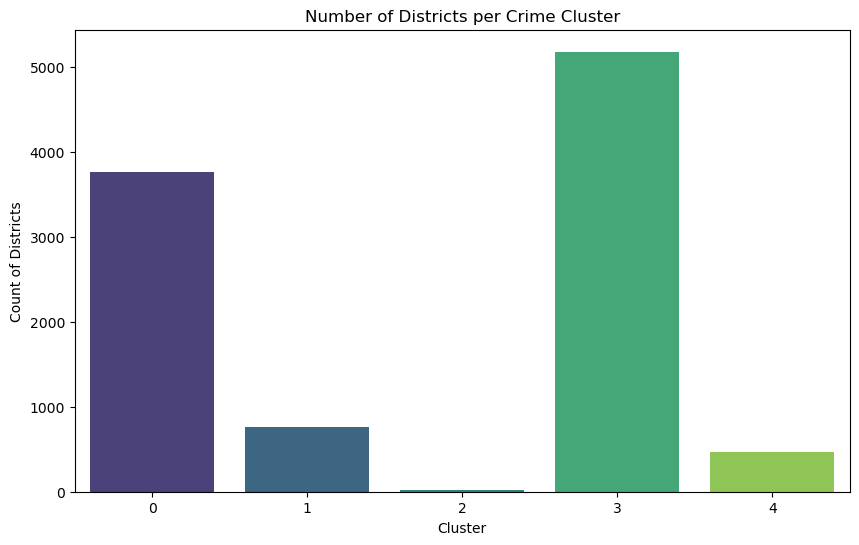

In [90]:
# Step 5: Visualize clusters (optional)
plt.figure(figsize=(10,6))
sns.countplot(data=df_1, x='Crime_Cluster', palette='viridis')
plt.title("Number of Districts per Crime Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count of Districts")
plt.show()

C:\Users\Nayan Bhandari\AppData\Local\Temp\ipykernel_22500\2309173266.py:7: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



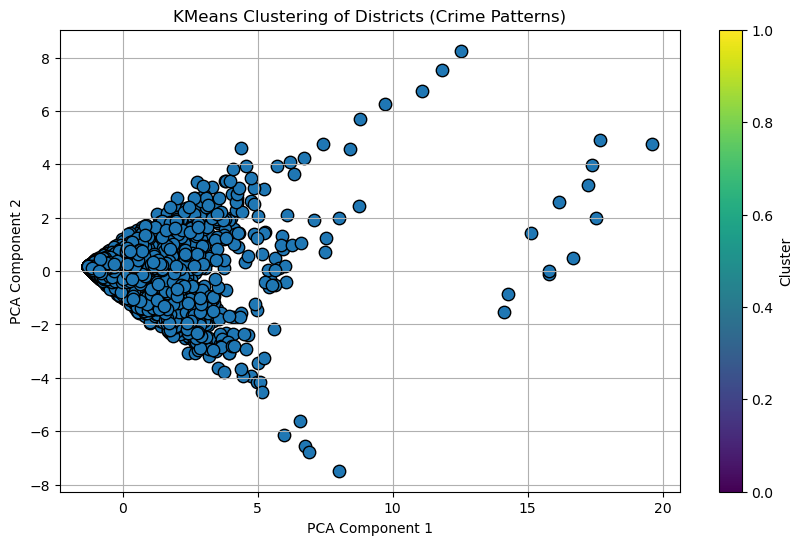

In [91]:

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],  cmap='Set2', s=80, edgecolor='k')
plt.title('KMeans Clustering of Districts (Crime Patterns)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()


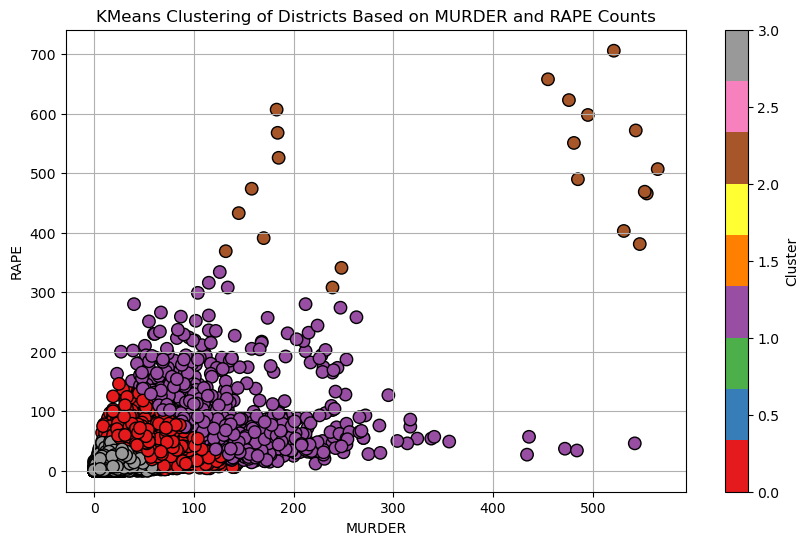

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select two crime-related features for clustering and plotting
features = ['MURDER', 'RAPE']
X = df_1[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['MURDER'],
    df['RAPE'],
    c=df['Cluster'],
    cmap='Set1',
    s=80,
    edgecolor='k'
)

plt.title('KMeans Clustering of Districts Based on MURDER and RAPE Counts')
plt.xlabel('MURDER')
plt.ylabel('RAPE')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()

# Regression

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



# Group data to get total IPC crimes per year across all districts
yearly_crime = no_total_rows.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

# Prepare features and target
X = yearly_crime[['YEAR']]  # independent variable
y = yearly_crime['TOTAL IPC CRIMES']  # dependent variable


In [93]:
yearly_crime

,YEAR,TOTAL IPC CRIMES
0,2001,1823692
1,2002,1829467
2,2003,1763524
3,2004,1885633
4,2005,1878667
5,2006,1936256
6,2007,2045738
7,2008,2142729
8,2009,2171596
9,2010,2276123


In [94]:
# Polynomial features (degree 2 or 3 usually works well)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [95]:
model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [96]:
# Predict for existing years
y_pred = model.predict(X_poly)



In [97]:
# Calculate  R² Score

r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f}")

R² Score: 0.9871


In [98]:
# Future years to forecast
future_years = pd.DataFrame({'YEAR': np.arange(2015, 2020)})

# Transform future years using the same polynomial transformer
future_years_poly = poly.transform(future_years)

# Predict total IPC crimes for future years
future_predictions = model.predict(future_years_poly)

# Combine future years with predictions
forecast_df = future_years.copy()
forecast_df['Predicted_Total_IPC_Crimes'] = future_predictions.astype(int)

print("Forecasted Total IPC Crimes (2015–2020):")
print(forecast_df)


Forecasted Total IPC Crimes (2015–2020):
   YEAR  Predicted_Total_IPC_Crimes
0  2015                     2971164
1  2016                     3147203
2  2017                     3335685
3  2018                     3536611
4  2019                     3749979


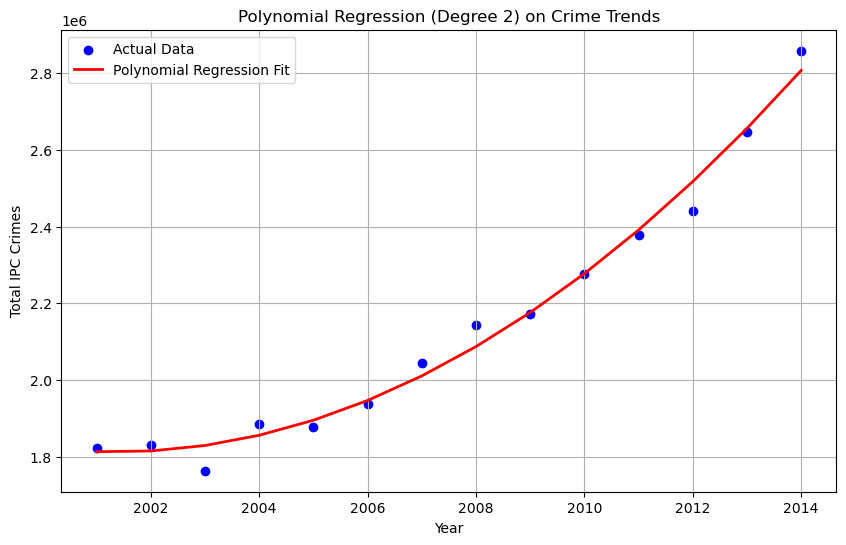

In [99]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Regression Fit')
plt.title(f"Polynomial Regression (Degree {degree}) on Crime Trends")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.legend()
plt.grid(True)
plt.show()


In [100]:
# Combine actual and predicted for plotting
combined_years = pd.concat([X, future_years])
combined_years_poly = poly.transform(combined_years)
combined_predictions = model.predict(combined_years_poly)



In [102]:
combined_years

,YEAR
0,2001
1,2002
2,2003
3,2004
4,2005
5,2006
6,2007
7,2008
8,2009
9,2010


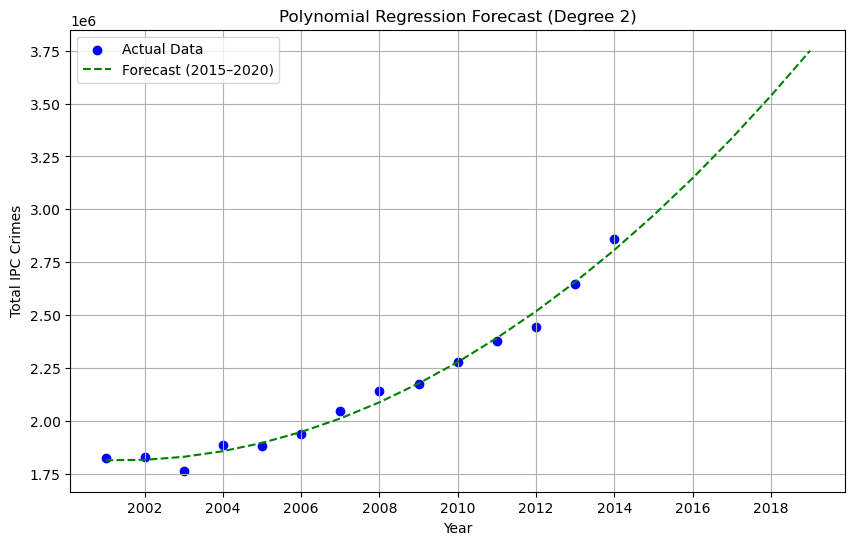

In [103]:
import matplotlib.ticker as ticker

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(combined_years, combined_predictions, color='green', linestyle='--', label='Forecast (2015–2020)')
plt.title(f"Polynomial Regression Forecast (Degree {degree})")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.legend()
plt.grid(True)

# Force x-axis to use only integer years
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


# For these particular questions below -

1.   Use a machine learning model to classify high-crime and low-crime districts.

2.   Develop a crime risk index for districts based on historical data.

We have not done anything because it makes no sense. There are no labels and I dont know on what basis do I generate them. Also, it can be done using a hueristic approach which doesnot require machine learning. One aspect of problem solving in data science is to solve the problem using the least possible effort and common sense. In addition, you guys should have provided the mathematical formulas for what exactly you were asking. I dont know how to quantify crime risk index in your perspective.





In [104]:
crime_on_women = no_total_rows[['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
'DOWRY DEATHS',
'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
'INSULT TO MODESTY OF WOMEN',
'CRUELTY BY HUSBAND OR HIS RELATIVES',
'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','TOTAL IPC CRIMES']]

In [105]:
crime_on_women

,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,TOTAL IPC CRIMES
0,30,16,149,34,175,0,4154
1,30,7,118,24,154,0,4125
2,34,14,112,83,186,0,5818
3,20,17,126,38,57,0,3140
4,26,12,109,58,247,0,6507
...,...,...,...,...,...,...,...
10670,0,0,0,0,0,0,0
10671,82,13,484,63,416,0,18488
10673,0,0,1,2,0,0,81
10675,0,0,12,1,1,0,671


In [106]:
z = crime_on_women.sum()/crime_on_women['TOTAL IPC CRIMES'].sum()
z = z.sum()-1
print(z*100)

7.831199153710555


In [107]:
highest_dowry_deaaths_state = no_total_rows.groupby('STATE/UT')['DOWRY DEATHS'].sum().sort_values( ascending=False)

In [108]:
highest_dowry_deaaths_state.head(1)

STATE/UT
UTTAR PRADESH    28628
Name: DOWRY DEATHS, dtype: int64

# Seasonality check


In [109]:
yearly_crime

,YEAR,TOTAL IPC CRIMES
0,2001,1823692
1,2002,1829467
2,2003,1763524
3,2004,1885633
4,2005,1878667
5,2006,1936256
6,2007,2045738
7,2008,2142729
8,2009,2171596
9,2010,2276123


In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [111]:
result = seasonal_decompose(yearly_crime['TOTAL IPC CRIMES'], model='additive', period = 3)  # or model='multiplicative'


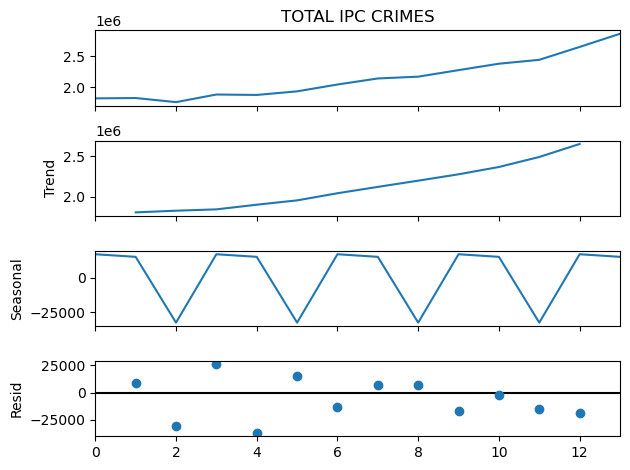

In [112]:
result.plot()
plt.tight_layout()
plt.show()


1.   Examine if there is a link between cities and crime rates.

Again I dont have an answer to this question. Cities can have calculated crime rates but I dont know how to check if they are linked with cities.  


# Time Series Model

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [91]:
yearly_crime

,YEAR,TOTAL IPC CRIMES
0,2001,1823692
1,2002,1829467
2,2003,1763524
3,2004,1885633
4,2005,1878667
5,2006,1936256
6,2007,2045738
7,2008,2142729
8,2009,2171596
9,2010,2276123


In [114]:
yearly_crime = yearly_crime.set_index('YEAR')


In [115]:
yearly_crime.index = pd.to_datetime(yearly_crime.index, format='%Y')


In [126]:
yearly_crime

,TOTAL IPC CRIMES
YEAR,
2001-01-01,1823692
2002-01-01,1829467
2003-01-01,1763524
2004-01-01,1885633
2005-01-01,1878667
2006-01-01,1936256
2007-01-01,2045738
2008-01-01,2142729
2009-01-01,2171596


In [116]:
from statsmodels.tsa.stattools import adfuller

# Assume 'your_time_series' is a pandas Series with a datetime index
result = adfuller(yearly_crime)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

if result[1] < 0.05:
    print("✅ Series is stationary.")
else:
    print("⚠️ Series is NOT stationary.")


ADF Statistic: 1.915563508141764
p-value: 0.9985526512469384
Critical Value (1%): -4.6651863281249994
Critical Value (5%): -3.3671868750000002
Critical Value (10%): -2.802960625
⚠️ Series is NOT stationary.


In [ ]:
#The series is not stationary, hence we will be using the Holt winters trend model which doesnot require our series to get differenced. 

In [119]:
y = yearly_crime['TOTAL IPC CRIMES']

In [127]:
print(y)

YEAR
2001-01-01    1823692
2002-01-01    1829467
2003-01-01    1763524
2004-01-01    1885633
2005-01-01    1878667
2006-01-01    1936256
2007-01-01    2045738
2008-01-01    2142729
2009-01-01    2171596
2010-01-01    2276123
2011-01-01    2378928
2012-01-01    2441475
2013-01-01    2647722
2014-01-01    2858939
Name: TOTAL IPC CRIMES, dtype: int64


In [120]:
train = y[:-5]
test = y[-5:]


In [123]:
from statsmodels.tsa.holtwinters import Holt

model = Holt(train).fit()
forecast = model.forecast(len(test))


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [124]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test, forecast)
print(f"MAPE: {mape * 100:.2f}%")

SyntaxError: invalid non-printable character U+00A0 (1711097457.py, line 4)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Forecasted Values:
 2015-01-01    2.995338e+06
2016-01-01    3.156719e+06
2017-01-01    3.318101e+06
2018-01-01    3.479483e+06
2019-01-01    3.640865e+06
Freq: YS-JAN, dtype: float64


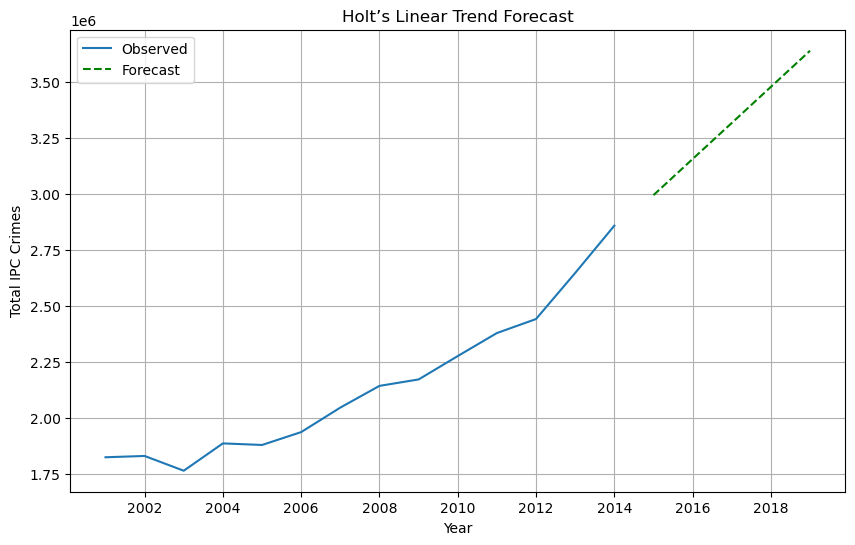

In [125]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt’s Linear Trend Model
model = ExponentialSmoothing(y, trend='add', seasonal=None)
model_fit = model.fit()

# Forecast next 5 years (or whatever period you want)
forecast = model_fit.forecast(steps=5)
print("Forecasted Values:\n", forecast)

# Optional: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y, label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='green', linestyle='--')
plt.title('Holt’s Linear Trend Forecast')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.legend()
plt.grid(True)
plt.show()